# Multimodal Fusion Music Recommendation System

The purpose of this notebook is to perform the full data extraction, preprocessing, loading, and model pipeline.

In [102]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data Extraction

In [94]:
# Install the required packages
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [95]:
# Download the dataset
!bash download_dataset.sh

Directory 'data' already exists.
Starting download from: http://www.ee.columbia.edu/~thierry/artist_term.db
--2024-11-20 18:22:56--  http://www.ee.columbia.edu/~thierry/artist_term.db
Resolving www.ee.columbia.edu (www.ee.columbia.edu)... 162.159.128.65, 162.159.138.64
Connecting to www.ee.columbia.edu (www.ee.columbia.edu)|162.159.128.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ee.columbia.edu/~thierry/artist_term.db [following]
--2024-11-20 18:22:56--  https://www.ee.columbia.edu/~thierry/artist_term.db
Connecting to www.ee.columbia.edu (www.ee.columbia.edu)|162.159.128.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138974208 (133M)
Saving to: ‘data/artist_term.db’

data/artist_term.db 100%[===================>] 132.54M  9.12MB/s    in 15s     

2024-11-20 18:23:12 (8.72 MB/s) - ‘data/artist_term.db’ saved [138974208/138974208]

Download completed successfully. Saved as 'data/artist_term.db'.
S

## Preprocessing

In [96]:
from preprocessing.util.processor import Processor

Read data from databases/datasets, do some basic preprocessing, and save them as DataFrames serialized to pickle files.

In [97]:
processor = Processor(debug_messages=True)
processor.process()
processor.save_data()

Reading user listening history file: 48373586it [00:19, 2465629.95it/s]


Read 48373586 user triplets.
Reading mbtags from data/artist_term.db
Reading metadata from data/track_metadata.db
Database connected.
Columns in 'lyrics' table: ['track_id', 'mxm_tid', 'word', 'count', 'is_test']
Lyrics table processed and pivoted with song_id as index.
Database connection closed.


## Loading

In [103]:
from models.data_provider import DataProvider

In [104]:
data_provider = DataProvider(
    label_embedding_technique='w2v',
    embedding_config={
        'vector_size': 100,
        'window': 5,
        'min_count': 5,
        'workers': 4,
        'sg': 1
    },
    save_embeddings_to_file=True,
    load_embeddings_from_file=True,
    clustering_method='kmeans',
    debug=True
)

In [105]:
data_provider.load_data()

Reading labels.
Reading metadata.


In [106]:
data_provider.generate_training_classes(cluster_config={'n_clusters': 10})

Generating training classes.
Reading label embedding dictionary from data/intermediate_output/label_embeddings/embedding_w2v.pkl.
Aggregating embeddings for all tracks.
Clustering mbtag_embedding.


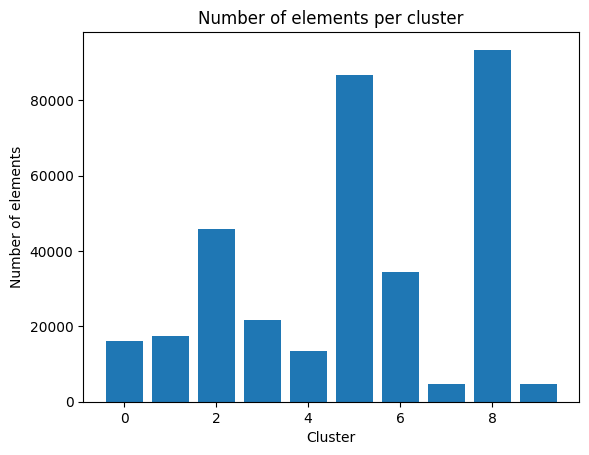

In [107]:
data_provider.plot_cluster_distribution()

## Model